# DS 3000 - Assignment 11

**Student Name**: Simrin Ramchandani

**Date**: 03/25/2025

### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Question 1: 

2 pts) Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print('Dimensions:',df.shape)
print(round(df.describe()),2)

Dimensions: (768, 9)
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count        768.0    768.0          768.0          768.0    768.0  768.0   
mean           4.0    121.0           69.0           21.0     80.0   32.0   
std            3.0     32.0           19.0           16.0    115.0    8.0   
min            0.0      0.0            0.0            0.0      0.0    0.0   
25%            1.0     99.0           62.0            0.0      0.0   27.0   
50%            3.0    117.0           72.0           23.0     30.0   32.0   
75%            6.0    140.0           80.0           32.0    127.0   37.0   
max           17.0    199.0          122.0           99.0    846.0   67.0   

       DiabetesPedigreeFunction    Age  Outcome  
count                     768.0  768.0    768.0  
mean                        0.0   33.0      0.0  
std                         0.0   12.0      0.0  
min                         0.0   21.0      0.0  
25%                         0.0   2

##### Observations

The datasest contains 768 rows and 9 columns, where the final column 'Outcome' is the target variable indicating whether the patient has diabetes (1) or not (0).

Some features, such as Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI, have minimum values of 0, which is not realistic in a medical context and may indicate missing data.

Pregnancies is a numeric feature, while others like Glucose, BMI, and Age are continuous.

## Question 2: 
(5 pts) Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

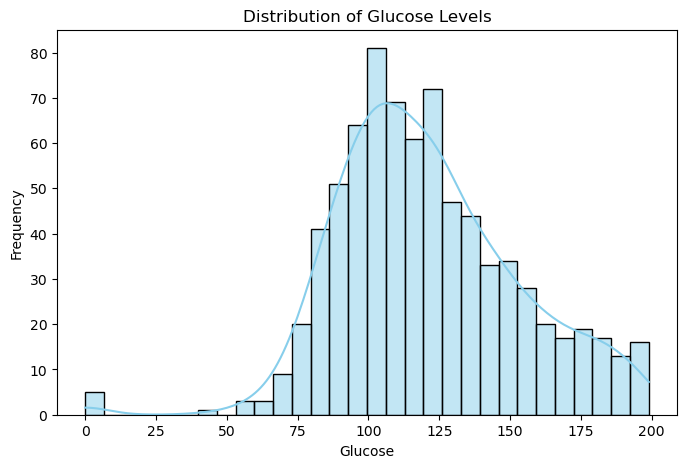

In [4]:
# 1. Distribution of Glucose
plt.figure(figsize=(8, 5))
sns.histplot(df['Glucose'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

This histogram visualizes how glucose values are distributed across all patients in the dataset. The distribution of glucose levels is right-skewed with most values concentrated between 90 and 130. There is a peak around 100-110, which could represent non-diabetic individuals. A tail of higher glucose values extends past 150, indicating a smaller group of patients with higher glucose levels, potentially those with diabetes. There are also a few extreme low values, including 0, which are not realistic and may indicate missing or invalid entries.

C:\Users\simri\AppData\Local\Temp\ipykernel_2944\787241426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')


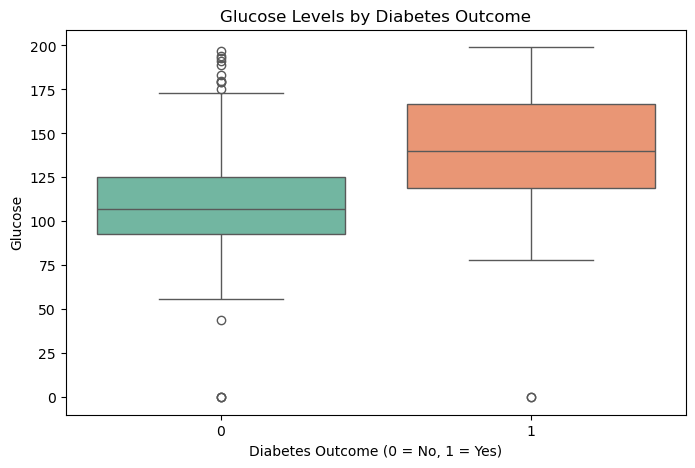

In [5]:
# 2. Boxplot of Glucose by Outcome
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Glucose')
plt.show()

This boxplot compares glucose levels between patients with and without diabetes. Patients with diabetes (Outcome = 1) have significantly higher glucose levels on average, with a median around 140. Patients without diabetes (Outcome = 0) have a lower median glucose level, around 105.

## Question 3: 
(3 pts) Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).


In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Columns where zero is an invalid value
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count how many zeros exist in each
print("\nCount of zero values in columns:\n")
for col in invalid_zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count}")


Count of zero values in columns:

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [8]:
# Replace zeros in those columns with NaN
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

# check how many are missing
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Impute missing values using the median
df[invalid_zero_cols] = df[invalid_zero_cols].fillna(df[invalid_zero_cols].median())

# Verify missing values have been handled
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Question 4: 
(5 pts) Partition the data into train/test sets. After which, performe the following:
- encode any categorical data
- normalize numeric data

Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which tranform the test set (there is an example in the lecture).


In [10]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Question 5: 
(10 pts) Build the model that predicts the target variable. Ensure that you:
- Instantiate the correct SVM Model, train, and evaluate it.
- Perform cross validation. You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
- Display: 1) the best model/parameters and 2) the best score that was obtained


In [11]:
# Define the model
svm = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [12]:
# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", round(grid_search.best_score_, 2))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation F1 Score: 0.63


In [13]:
# Evaluate best model on test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

# Classification report on test data
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))


Classification Report on Test Set:
              precision    recall  f1-score   support

Non-Diabetic       0.78      0.84      0.81       100
    Diabetic       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



## Question 6: 
(5 pts) Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.

The model's best cross-validation F1 score was 0.628, while its F1 score on the test set for the diabetic class was 0.60. These scores are relatively close, suggesting that the model generalizes well frm the training data to unseen data. This indicates a good balance between bias and variance.

There is no significant overfitting, as the model's performance is consistent across train and test sets. Similarly, there is no significant underfitting, as the F1 scores show the model has learned meaningful patterns.

Overall, the model is of moderate quality. While it is not perfect, especially in detecting diabetic patients (recall = 0.56), it provides a solid baseline.

## Question 7: 
(15 pts) Perform the requirements from questions 5 & 6 above using 1) the k-nn algorithm and 2) any tree-based algorithm of your choice. Ensure that you explain your steps and discuss the quality of each model with respect to the bias-variance dilemma.

In [14]:
# Set up the model and hyperparameter grid
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# GridSearchCV
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)

# Best params and score
print("k-NN Best Parameters:", grid_knn.best_params_)
print("k-NN Best CV F1 Score:", round(grid_knn.best_score_, 2))

# Predict on test set
knn_best = grid_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test_scaled)

# Test set evaluation
print("\nClassification Report for k-NN:")
print(classification_report(y_test, y_pred_knn, target_names=['Non-Diabetic', 'Diabetic']))


k-NN Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
k-NN Best CV F1 Score: 0.63

Classification Report for k-NN:
              precision    recall  f1-score   support

Non-Diabetic       0.79      0.81      0.80       100
    Diabetic       0.63      0.61      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



##### k-Nearest Neighbors

We used KNeighborsClassifier and tuned two hyperparameters using GridSearchCV:

- Best Parameters: n_neighbors = 9, weights = 'distance'
- Cross-Validation F1 Score: 0.63
- Test Set F1 Score (Diabetic): 0.62
- Accuracy: 0.74

The k-NN model performed reasonably well with balanced precision and recall for both diabetic and non-diabetic cases. Its test results were close to the training results, which means it is not overfitting or underfitting. It generalizes well, especially for a model like k-NN that depends a lot on the data layout.

In [15]:
# Set up the model and hyperparameter grid
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train) 

# Best params and score
print("Random Forest Best Parameters:", grid_rf.best_params_)
print("Random Forest Best CV F1 Score:", round(grid_rf.best_score_, 2))

# Predict on test set
rf_best = grid_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Test set evaluation
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Diabetic', 'Diabetic']))


Random Forest Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50}
Random Forest Best CV F1 Score: 0.66

Classification Report for Random Forest:
              precision    recall  f1-score   support

Non-Diabetic       0.76      0.84      0.80       100
    Diabetic       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



##### Random Forest

- Best Parameters: n_estimators = 50, max_depth = 8, criterion = 'gini'
- Cross-Validation F1 Score: 0.66
- Test Set F1 Score (Diabetic): 0.57
- Accuracy: 0.73

The Random Forest model had the highest training F1 score, which means it picked up on more patterns in the data. But its test F1 score for diabetic cases dropped to 0.57, which could mean it is slightly overfitting. Even so, it did well overall, especially at correctly identifying non-diabetic cases.

## Question 8: 

(5 pts) Compare the best models from the SVM, k-NN and the tree-based model experiments and discuss the following:
- Did each model accurately predict the target (i.e. were the predictions from each model correct)?
- Determine which of the three models is the best overall model and justify your response.
   Hint: think about the model that generalizes and produced the best overall predictions.
- Would you advocate for the use of the selected model in the medical industry?

All 3 models were able to predict diabetes to a reasonable degree. Each one had good accuracy and picked up important patterns in the data. However, their ability to detect diabetic cases varied. 

- SVM has balanced performance but slightly lower recall for diabetic cases.
- k-NN was the most consistent, with similar training and test scores and good balance overall.
- Random Forest did best during training, but its test performance dropped a bit, suggesting possible overfitting.

- The k-NN is the best overall because it showed consistent performance on both the training and test sets, with solid F1 scores and no signs of overfitting. It generalizes well and is simple to understand and implement.


I would not advocate for its use in the medical industry. While the k-NN model was the most consistent, its recall for diabetic patients was only around 61%, which means it could miss a significant number of actual cases. In healthcare, where missing a diagnosis can have serious consequences, this level of performance isn’t high enough. This model could be used as a starting point for further development, but it would need to be improved — especially in terms of recall — before being considered for real-world medical use.